In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## First model

We have such a equation
$$\frac{dG}{dt}=p_1 G + p_2$$
And the solution is
$$G(t) = (p_3+\frac{p_2}{p_1}) e^{p_1t}-\frac{p_2}{p_1}$$

In [2]:
p_1=-1.09 / 10
p_2=8.5

p_3=150
size = 60

T = np.linspace(0, size, size)
G = np.array([(p_3 + p_2 / p_1) * np.exp(p_1 * t) - p_2 / p_1 + sps.norm(0, .3).rvs(1)[0]
              for t in T])

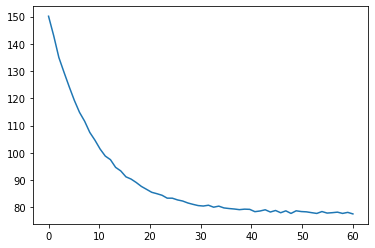

In [3]:
plt.plot(T, G)

In [5]:
Y = (G[1:] - G[:-1]) #/ (1. / 60)
X = np.array(G[:-1]).reshape((-1, 1))

In [6]:
model = LinearRegression().fit(X[:], Y[:])
y_pred = model.predict(X[:])

In [7]:
print('p1:', model.coef_[0])
print('p2:', model.intercept_)

p1: -0.10517910424112176
p2: 8.206591605842405


In [8]:
r2_score(y_pred, Y)

0.969927089650366

## TODO

0) Discover why parameters we found doesn't match true one - Vardan

1) Try time step 1 second instead 1 min - Lorenz

2) Try different model for first model - Anastasia

3) Try to do the same for second model - Stan

## Task 0 and 1

When we used wrong p_1 (10 times bigger that it should be), G declined too fast and as soon as we sampled to few points, we can't precisely calculate $\frac{dG}{dt}$. That's why coefs from Linear Regression doesn't match true ones. When we tried to sample more points it's became correct.

## Task 2

In [30]:
def find_g(p1, p2, p3, T, step=1):
    res = [p3]
    for _ in range(int(T * step)):
        dg_dt = p1 * res[-1] + p2
        res.append(res[-1] + dg_dt / step)
    
    return res

In [35]:
step = 10
G = find_g(p_1, p_2, p_3, 60, step)
G += sps.norm(0, .3).rvs(len(G))
G = G[::step]

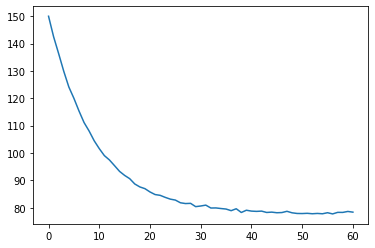

In [36]:
plt.plot(G)

In [37]:
Y = (G[1:] - G[:-1])
X = np.array(G[:-1]).reshape((-1, 1))

In [38]:
model = LinearRegression().fit(X[:], Y[:])
y_pred = model.predict(X[:])

In [39]:
print('p1:', model.coef_[0])
print('p2:', model.intercept_)

p1: -0.10408972290763066
p2: 8.11593720486597


In [40]:
r2_score(y_pred, Y)

0.9513260211005427